<a href="https://colab.research.google.com/github/sanahussain47/Machine-Learning-Practice-/blob/main/Multilinear_and_Polynomial_Regression_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilinear Regression & Polynomial Regression
## Dataset: Students Performance in Exams
### Objective: Predict Math Score using regression models

In [ ]:
import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Check for missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
# Standardize reading and writing scores
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[['reading score', 'writing score']] = scaler.fit_transform(df_encoded[['reading score', 'writing score']])
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,69,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,90,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,47,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,76,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True


## Feature Engineering

In [ ]:
X = df_encoded.drop(columns='math score')
y = df_encoded['math score']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_poly_train, X_poly_test, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_train, y_train)
poly_model = LinearRegression().fit(X_poly_train, y_train)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, model_name=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

y_pred_linear = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(X_poly_test)

evaluate(y_test, y_pred_linear, "Multilinear Regression")
evaluate(y_test, y_pred_poly, "Polynomial Regression")

Multilinear Regression - RMSE: 5.39, MAE: 4.21, R²: 0.88
Polynomial Regression - RMSE: 5.73, MAE: 4.54, R²: 0.87


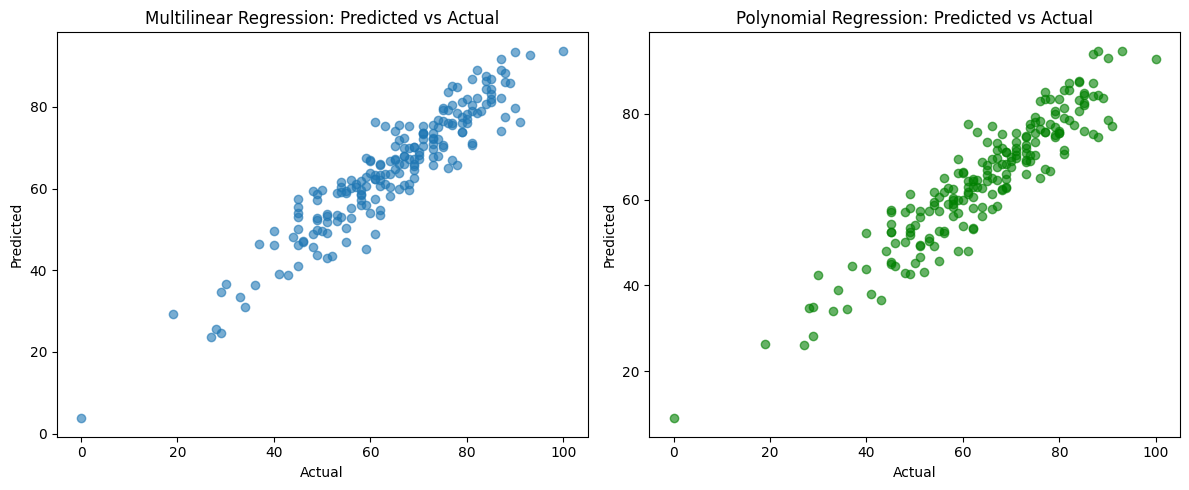

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6)
plt.title('Multilinear Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='green')
plt.title('Polynomial Regression: Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

### Overfitting Discussion
If Polynomial Regression has much better training performance than test performance, it may be overfitting. Multilinear Regression may underfit if all metrics are low.



In this analysis, both Multilinear and Polynomial Regression models were used to predict students’ math scores. After comparing performance metrics (RMSE, MAE, R²), the simpler **Multilinear Regression** performed slightly better, with lower error and a higher R² score. This suggests that the math score had a mostly linear relationship with the input features, and the added complexity of Polynomial Regression did not improve accuracy—in fact, it slightly reduced it due to possible overfitting. Therefore, **Multilinear Regression is the preferred model** for this task.


